# Giới thiệu

### Mục tiêu bài tập

* Hiểu thêm về cách hoạt động của Numpy và Tensorflow 
* Có thể viết một thuật toán đơn giản (và debug) với `Tensorflow` và `Numpy` qua ví dụ về hồi quy tuyến tính.
* Hiểu thêm về hồi quy tuyến tính.
* Tối ưu các tham số của mô hình.

# Giới thiệu bài toán và dữ liệu

Bài toán lần này, chúng ta sẽ cùng nhau dự đoán giá nhà tại một thành phố Boston ở Mỹ với kích thước mẫu với 506 giá trị với 13 thuộc tính như sau

```
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)ˆ2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's
```

Với thông tin này, ta sẽ cùng nhau tiến hành xây dựng một hàm giả thuyết theo mô hình hồi quy tuyến tính dựa trên `numpy` và `tensorflow` để đưa ra giá nhà dựa trên tối đa 10 thuộc tính.
# Chấm điểm
Bài tập này chiếm 50% số điểm cuối kì của mỗi bạn. Điểm được chấm dựa trên các yếu tố sau:

### Báo cáo đầy đủ rõ ràng các công việc đã làm, chứng minh được công việc đã làm thỏa các yêu cầu của đề bài (2 điểm)

### Chương trình chạy được huấn luyện được mô hình, tính toán được Jtest, Jtrain
+ load dữ liệu (1 điểm)
+ trình bày dữ liệu trước khi huấn luyện (1 điểm)
+ xây dựng được mô hình (1 điểm)
+ tính được độ chính xác của mô hình với tập huấn luyện, tập cross validation, tập test (1 điểm)

### Tối ưu hóa được các tham số của mô hình (4 điểm)
+ tối ưu được các tham số cho mô hình và giải thích. Được chọn tối đa 10 thuộc tính trong số các thuộc tính được cung cấp.

Ghi chú: khi vấn đáp mỗi thành viên sẽ được hỏi một câu bất kì liên quan đến các phần trên

### I/ Tìm nghiệm bài toán Linear Regression bằng `Numpy`

#### Nhập thư viện

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Đọc dữ liệu

In [56]:
data=pd.read_csv(r'C:\Users\Thanh Long\Desktop\AI\data\housing.csv', delim_whitespace=' ', header=None)
# Thêm header cho dataframe
data.columns = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
# Index bắt đầu từ 1
data.index = np.arange(1, len(data)+1)

In [57]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Feature Selection

In [58]:
features=['indus','age','rm','dis','lstat']

### Splitting dataset into X and y

In [59]:
X=data[features]
y=data['medv']

In [60]:
X.head()

,indus,age,rm,dis,lstat
1,2.31,65.2,6.575,4.0900,4.98
2,7.07,78.9,6.421,4.9671,9.14
3,7.07,61.1,7.185,4.9671,4.03
4,2.18,45.8,6.998,6.0622,2.94
5,2.18,54.2,7.147,6.0622,5.33


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [68]:
X_train=X_train.values
y_train=y_train.values

Vừa rồi, ta vừa mới tải tập dữ liệu xuống và chiết ra thành 4 tập. 

Trong đó, `train_X` và `train_Y` được dùng để xây dựng mô hình. Còn `X_test`, `y_test` được giữ lại và chỉ được dùng để đánh giá độ tốt của mô hình ở phút cuối. 

Tỉ lệ được chia ra giữa các phần xây dựng và kiểm chứng là 1:4 Sau này, chúng ta sẽ học kỹ hơn về phần này nên phần đánh giá độ tốt của mô hình mình chỉ dừng lại ở mức là thực thi câu hàm đánh giá.

Để đơn giản, dữ liệu được lấy vào chỉ gồm 5 đặc tính

```
    - indus
    - age
    - rm
    - dis
    - lstat
```

#### Minh họa dữ liệu

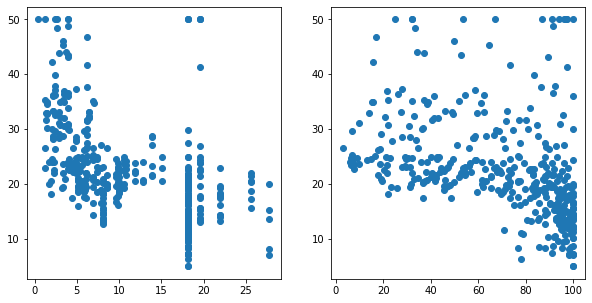

In [78]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5));

ax[0].scatter(X_train[:,0],y_train)
ax[1].scatter(X_train[:,1],y_train)

Hiên thời, vecto của ta đang có dạng như sau:

In [80]:
print("Size of data X train matrix %s"  % str(X_train.shape))
print("Size of data Y train array %s"  % str(y_train.shape))
print("Size of data X test matrix %s"  % str(X_test.shape))
print("Size of data Y test array %s"  % str(y_test.shape))

Size of data X train matrix (404, 5)
Size of data Y train array (404,)
Size of data X test matrix (102, 5)
Size of data Y test array (102,)


#### Bài 1. Viết hàm cost function
$$J(w) = \frac{1}{m} \sum_{i=1}^m loss(\hat{y}^{(i)}, y^{(i)})= \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})^2 $$
Khai triển, ta có kết quả:
$$J(w) = \frac{1}{2m} \sum_{i=1}^m (w_1 x_1^{(i)} + w_2 x_2^{(i)} + b - y^{(i)})^2 $$

#### 1.1. Viết chương trình

In [106]:
def np_cost(w, b, X, y):
    '''
    Evaluate the cost function in a non-vectorized manner for 
    inputs `X` and targets `y`, at weights `w` and `b`.
    
    X: 2D array dataset that has (m, n) dimension. 
    y: list of targets that has (n, ) dimension.
    w: list of weights that has (n, ) dimension
    b: a scalar bias.
    
    Return a scalar cost value of `w`, `b`.
    '''
    
    cost = 0
    m = X.shape[0]
    for i in range(m):
        
        # TODO: complete below expression to calculate cost function
        y_hat = w[0]*X[i, 0] + w[1]*X[i, 1] + w[2]*X[i, 2] + w[3]*X[i, 3] + w[4]*X[i, 4] + b # hypothesis
        cost += (y_hat - y[i])**2 # sum cost of each data point.
        
    return cost/(2*m)

#### 1.2 Chạy thử chương trình 

In [107]:
np_cost([1,2,3,4,5], 20, X_train, y_train)

33631.86059655327

In [108]:
np_cost([1,2,3,4,5], 0, X_train, y_train) 

28950.19433912752

#### Bài 2. Vector hóa hàm cost

Ngoài ra, ta còn có thể viết lại công thức trên như sau:

$$J(w) = \frac{1}{2m} \| X w + b  - y \| ^2$$ 

#### 2.1 Viết chương trình

In [94]:
def np_cost_vectorized(w, b, X, y):
    '''
    Evaluate the cost function in a vectorized manner for 
    inputs `X` and targets `t`, at weights `w` and `b`.
    
    X: dataset matrix has (m, n) dimension. 
    y: targets vector has (n, ) dimension.
    w: weights vector has (n, ) dimension
    b: a scalar bias.
    
    Return a scalar cost value of `w`, `b`.
    '''
    
    #TODO: Complete the following expression
    m = X.shape[0] # number of samples in dataset
    w = np.array(w) # convert to numpy array
    y_hat = np.dot(X, w) + b# hypothesis
    
    return np.sum((y_hat - y)**2)/(2*m)

#### 2.2 Chạy thử chương trình

In [104]:
np_cost_vectorized([1,2,3,4,5], 20, X_train, y_train) # 2256.1627893564355

33631.86059655326

In [111]:
np_cost_vectorized([1,2,3,4,5], 0, X_train, y_train) # 1210.8142745049508

28950.194339127524

In [112]:
X_test.shape

(102, 5)

### Tạo X_train_new có dạng [. . . . . . . 1]

In [169]:
X_train_new=np.zeros([X_train.shape[0],X_train.shape[1]+1])
X_train_new[:,-1]=1
X_train_new[:,:-1]=X_train

X_train_new

array([[ 6.2   , 88.5   ,  6.951 ,  2.8617,  9.71  ,  1.    ],
       [10.81  , 17.5   ,  5.961 ,  5.2873,  9.88  ,  1.    ],
       [ 4.93  , 54.3   ,  6.897 ,  6.3361, 11.38  ,  1.    ],
       ...,
       [10.01  , 82.6   ,  6.021 ,  2.7474, 10.3   ,  1.    ],
       [ 6.91  , 85.5   ,  6.03  ,  5.6894, 18.8   ,  1.    ],
       [ 4.05  , 88.5   ,  5.572 ,  2.5961, 14.69  ,  1.    ]])

In [171]:
X_test_new=np.zeros([X_test.shape[0],X_test.shape[1]+1])
X_test_new[:,-1]=1
X_test_new[:,:-1]=X_test

#### Bài 4.Tính vector gradient của w

Với $i = 1...m $ và $j = 1...n$ xét

$$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m x_j^{(i)}(\hat{y}^{(i)}-y^{(i)}) $$



#### 4.1 Viết chương trình với vòng `for`

In [132]:
def np_grad_fn(w, X, y):
    '''
    Given `w` - a current "Guess" of what our weights should be
          `X` - matrix of shape (m, n + 1) of input features
          `y` - target y values
    Return gradient of each weight evaluated at the current value
    '''
    
    #TODO: Complete the below followed the above expressions
    grad_w = np.zeros(np.array(w).shape)
    m = X.shape[0]
    y_hat = np.dot(X, w)
    for j in range(grad_w.shape[0]):
        for i in range(m):
            grad_w[j] += (y_hat[i] - y[i])*X[i, j]/m
    return grad_w

In [136]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
np_grad_fn(w, X_train_new, y_train)

array([103.9942521 , 504.1578294 ,   9.71058626,  -7.18257847,
       135.34728975,   2.65763822])

#### 4.2 Viết chương trình theo dạng vectorized
$$\nabla J(w) = \frac{1}{m} X^T \left( Xw - y \right)$$ 

In [137]:
def np_grad_fn_vectorized(w, X, y):
    '''
    Given `w` - a current "Guess" of what our weights should be
          `X` - matrix of shape (m, n + 1) of input features
          `y` - target y values
    Return gradient of each weight evaluated at the current value
    '''
    
    #TODO: Complete the below followed the above expressions
    m, n = X.shape
    y_hat = np.dot(X, w)
    grad_w = np.dot(X.T, y_hat - y)/m
    
    return grad_w

In [139]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
np_grad_fn_vectorized(w, X_train_new, y_train) #[-183.46936646, -130.26687224,  -19.93917772]

array([103.9942521 , 504.1578294 ,   9.71058626,  -7.18257847,
       135.34728975,   2.65763822])

#### Bài  5. Tính dựa trên Gradient Descent

Xấp xỉ giá trị $w$ như sau

$$ w_j = w_j - \alpha * \frac{\partial J}{\partial w_j}$$

#### 5.1 Viết chương trình

In [157]:
def np_solve_via_gradient_descent(X, y, print_every=5000,
                                  niter=100000, alpha=0.0002):
    '''
    Given `X` - matrix of shape (m, n+1) of input features
          `y` - target y values
    Solves for linear regression weights.
    Return weights after `niter` iterations.
    '''
    m, n = X.shape
    # initialize all the weights to zeros
    w = np.zeros((n,))
    for k in range(niter):
        
        #TODO: Complete the below followed the above expressions
        dw = np_grad_fn_vectorized(w, X, y) 
        w = w - alpha*dw
        
        if k % print_every == 0:
            print('Weight after %d iteration: %s' % (k, str(w)))
    return w

#### 5.2 Chạy thử chương trình

In [158]:
opt_w = np_solve_via_gradient_descent(X_train_new, y_train, niter=300000,alpha=0.0003)

Weight after 0 iteration: [0.06530513 0.43613026 0.04410279 0.02719216 0.07094378 0.00678356]
Weight after 5000 iteration: [-0.14438498  0.03206708  4.64174795  0.05482797 -0.64053881  0.57114184]
Weight after 10000 iteration: [-2.06186031e-01 -1.33070846e-03  5.35065221e+00 -5.47902807e-01
 -5.82833390e-01  6.91533793e-01]
Weight after 15000 iteration: [-0.22300177 -0.01034071  5.53665596 -0.71107885 -0.56760393  0.76522382]
Weight after 20000 iteration: [-0.22772108 -0.0127934   5.58209624 -0.75606505 -0.5637932   0.8261006 ]
Weight after 25000 iteration: [-0.22918681 -0.01348283  5.58977166 -0.76926669 -0.56305085  0.88327735]
Weight after 30000 iteration: [-0.22977653 -0.013698    5.58732145 -0.77391556 -0.56313174  0.93920593]
Weight after 35000 iteration: [-0.2301295  -0.01378546  5.58217679 -0.77625803 -0.56343223  0.99454714]
Weight after 40000 iteration: [-0.23041761 -0.0138384   5.57633553 -0.77797359 -0.56379004  1.0494802 ]
Weight after 45000 iteration: [-0.23068708 -0.0138

In [159]:
print("Training cost:", np_cost_vectorized(opt_w[:5], opt_w[-1], X_train, y_train)) 

Training cost: 13.440744635503254


In [173]:
print("Testing cost:", np_cost_vectorized(opt_w[:5], opt_w[-1], X_test, y_test)) 

Testing cost: 18.213556936712056


In [174]:
X_test_new.shape

(102, 6)

In [193]:
y_predict=X_test_new@opt_w
y_predict.shape
y_test.shape

(102,)

In [202]:
result=pd.DataFrame({'y':y_test,'y_predict':y_predict})
result.index = np.arange(1, len(result)+1)
result

,y,y_predict
1,22.6,27.366689
2,50.0,23.996138
3,23.0,23.552390
4,8.3,13.062768
5,21.2,21.204289
...,...,...
98,24.7,25.506677
99,14.1,19.784430
100,18.7,17.931811
101,28.1,25.460435


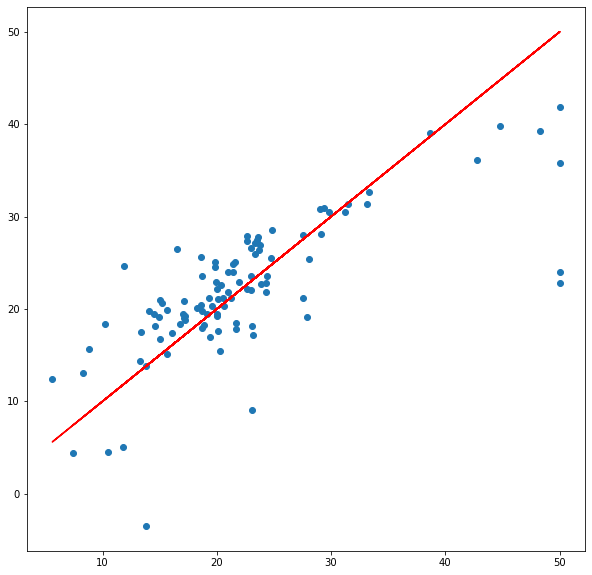

In [198]:
fig,ax=plt.subplots(figsize=[10,10])
plt.scatter(y_test,y_predict)
plt.plot(y_test,y_test,'r')